In [51]:
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

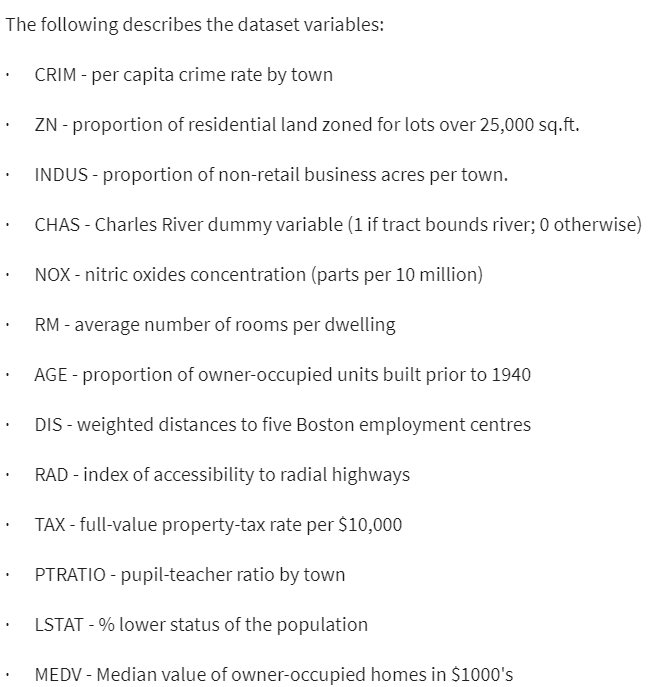

1) Generate Descriptive Statistics and Visualizations


[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

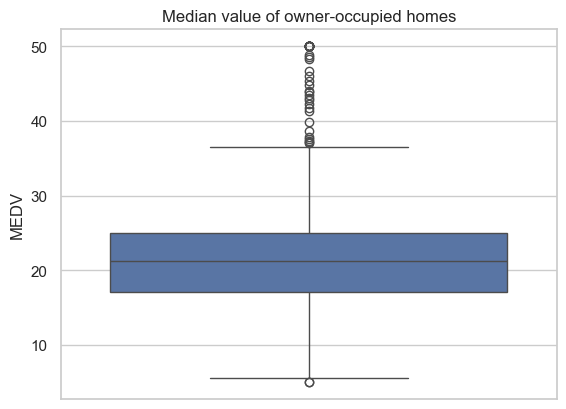

In [19]:
sns.boxplot( y='MEDV', data=boston_df).set(title='Median value of owner-occupied homes')

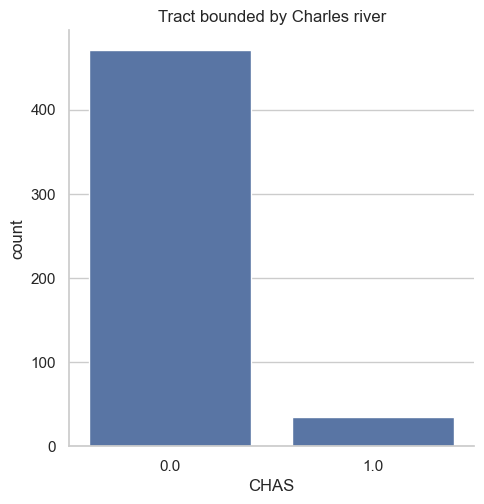

In [14]:
sns.set(style="whitegrid")
ax = sns.catplot( x="CHAS", kind='count',data=boston_df)
ax.set(title='Tract bounded by Charles river')


In [18]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [28]:
boston_df.loc[boston_df['AGE'] <=35,'AGE category']  ='0_to_35'
boston_df.loc[(boston_df['AGE'] >35) & ((boston_df['AGE'] <=70)),'AGE category']  ='35_to_70'
boston_df.loc[((boston_df['AGE'] >70)),'AGE category']  ='70_more'
boston_df.sort_values(by ='AGE category' )

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE category
252,252,0.08221,22.0,5.86,0.0,0.4310,6.957,6.8,8.9067,7.0,330.0,19.1,3.53,29.6,0_to_35
278,278,0.07978,40.0,6.41,0.0,0.4470,6.482,32.1,4.1403,4.0,254.0,17.6,7.19,29.1,0_to_35
279,279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,4.85,35.1,0_to_35
283,283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,3.16,50.0,0_to_35
284,284,0.00906,90.0,2.97,0.0,0.4000,7.088,20.8,7.3073,1.0,285.0,15.3,7.85,32.2,0_to_35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,0.14231,0.0,10.01,0.0,0.5470,6.254,84.2,2.2565,6.0,432.0,17.8,10.45,18.5,70_more
115,115,0.17134,0.0,10.01,0.0,0.5470,5.928,88.2,2.4631,6.0,432.0,17.8,15.76,18.3,70_more
116,116,0.13158,0.0,10.01,0.0,0.5470,6.176,72.5,2.7301,6.0,432.0,17.8,12.04,21.2,70_more
97,97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,4.21,38.7,70_more


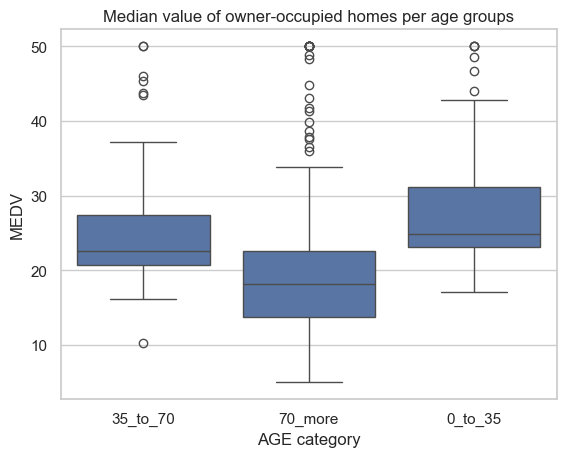

In [29]:
ax = sns.boxplot( x='AGE category', y='MEDV', data=boston_df).set(title='Median value of owner-occupied homes per age groups')


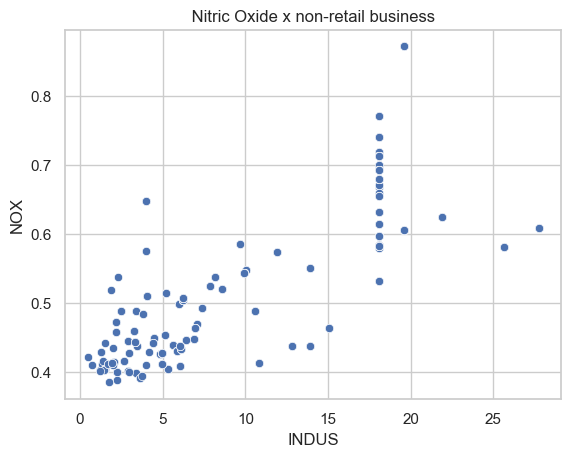

In [31]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(title =" Nitric Oxide x non-retail business ")

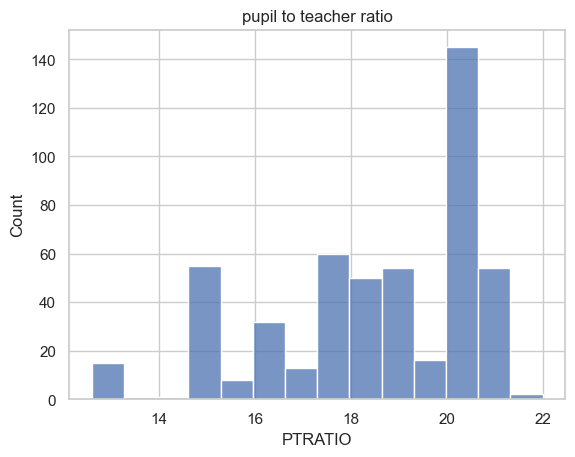

In [34]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False).set(title="pupil to teacher ratio")

<h2>2. Use the appropriate tests to answer the questions provided.</h2>


a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



H0 --> no difference in median value of houses bounded by the Charles river (µ1 = µ2)<br>
Ha --> there's meaningful difference (µ1 != µ2)

In [43]:
scipy.stats.levene(boston_df[boston_df['CHAS'] ==0]['MEDV'], 
                   boston_df[boston_df['CHAS'] ==1]['MEDV'], center='mean')


#How pvalue < 0,05 (5%), we cannot assume variance equality

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [40]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] ==0]['MEDV'], 
                   boston_df[boston_df['CHAS'] ==1]['MEDV'],equal_var = True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: pvalue < 0,05 (5%) --> we reject the null hypothesis
                             --> there's enough proof  that there is difference between medians

<br>
<br>
<br>
<br>
<br>

b) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 --> no difference in median (µ1 = µ2 = µ3)<br>
Ha --> at least one of them is different

In [44]:
scipy.stats.levene(boston_df[boston_df['AGE category'] == '0_to_35']['MEDV'],
                  boston_df[boston_df['AGE category'] == '35_to_70']['MEDV'], 
                   boston_df[boston_df['AGE category'] == '70_more']['MEDV'], 
                   center='mean')


# p-value > 5% ---> we can assume variance equality

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [46]:
f_statistic, p_value=scipy.stats.f_oneway(boston_df[boston_df['AGE category'] == '0_to_35']['MEDV'],
                  boston_df[boston_df['AGE category'] == '35_to_70']['MEDV'], 
                   boston_df[boston_df['AGE category'] == '70_more']['MEDV']
                   )

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# p-value < 5% --> reject H0. There's evidence that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: p-value < 5% --> reject H0. There's evidence that at least one of the means is different.

<br>
<br>
<br>
<br>

c) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0 --> no correlation<br>
Ha --> there is correlation

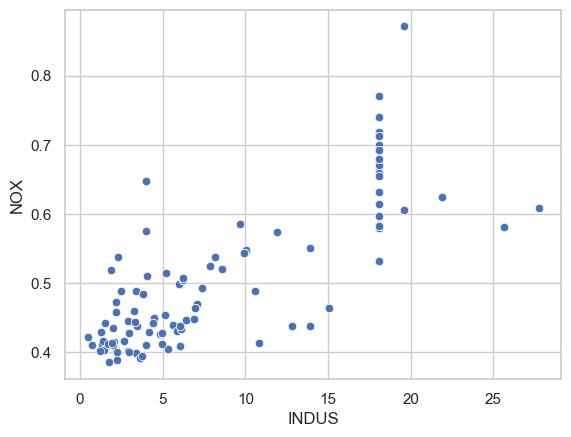

In [48]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

In [49]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#p-value < 5% -->  reject de null hypothesis. 
# there is correlation

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**conclusion:** p-value < 5% so we reject de null hypothesis. There is correlation
<br>
<br><br><br>

d)What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0 --> no impact
<br>
Ha --> there is impact

In [52]:

X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        22:19:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. We reject the H0


The additional impact is 1.096 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.
